In [1]:
#tools for imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#api and endpoints from nbaapi.stats: team & player ids
from nba_api.stats.static import players
from nba_api.stats.static import teams

##api and endpoints from nbaapi.stats: shot chart specifics
from nba_api.stats.endpoints import ShotChartDetail
from nba_api.stats.endpoints import ShotChartLineupDetail
from nba_api.stats.endpoints import ShotChartLeagueWide

from nba_api.stats.endpoints import PlayerDashboardByShootingSplits

from nba_api.stats.endpoints import LeagueDashPlayerPtShot

from nba_api.stats.endpoints import PlayerDashPtShots

In [2]:
#finding a players id:
players.find_players_by_first_name('Keldon')

[{'id': 1629640,
  'full_name': 'Keldon Johnson',
  'first_name': 'Keldon',
  'last_name': 'Johnson',
  'is_active': True}]

In [3]:
#finding a teams id by full name:
teams.find_teams_by_full_name('spurs')

[{'id': 1610612759,
  'full_name': 'San Antonio Spurs',
  'abbreviation': 'SAS',
  'nickname': 'Spurs',
  'city': 'San Antonio',
  'state': 'Texas',
  'year_founded': 1976}]

In [4]:
#setting up Keldon Johnson's variables:
team_id = 1610612759
player_id = 1629640

In [5]:
#creating a dataframe from shotchartdetails: (with Keldon Johnson's stats)
shotchart_df = ShotChartDetail(team_id, player_id).get_normalized_dict()
df=pd.DataFrame(shotchart_df['Shot_Chart_Detail'])
df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021900531,676,1629640,Keldon Johnson,1610612759,San Antonio Spurs,4,0,59,...,Center(C),Less Than 8 ft.,5,20,50,1,1,20200104,MIL,SAS
1,Shot Chart Detail,0021900734,629,1629640,Keldon Johnson,1610612759,San Antonio Spurs,4,1,16,...,Center(C),Less Than 8 ft.,6,54,43,1,1,20200201,SAS,CHA
2,Shot Chart Detail,0021900846,533,1629640,Keldon Johnson,1610612759,San Antonio Spurs,4,11,29,...,Center(C),Less Than 8 ft.,1,-18,-2,1,1,20200223,OKC,SAS
3,Shot Chart Detail,0021900846,555,1629640,Keldon Johnson,1610612759,San Antonio Spurs,4,9,14,...,Center(C),Less Than 8 ft.,0,0,1,1,1,20200223,OKC,SAS
4,Shot Chart Detail,0021900846,570,1629640,Keldon Johnson,1610612759,San Antonio Spurs,4,8,8,...,Center(C),Less Than 8 ft.,6,65,25,1,1,20200223,OKC,SAS


In [6]:
#looking at columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GRID_TYPE            862 non-null    object
 1   GAME_ID              862 non-null    object
 2   GAME_EVENT_ID        862 non-null    int64 
 3   PLAYER_ID            862 non-null    int64 
 4   PLAYER_NAME          862 non-null    object
 5   TEAM_ID              862 non-null    int64 
 6   TEAM_NAME            862 non-null    object
 7   PERIOD               862 non-null    int64 
 8   MINUTES_REMAINING    862 non-null    int64 
 9   SECONDS_REMAINING    862 non-null    int64 
 10  EVENT_TYPE           862 non-null    object
 11  ACTION_TYPE          862 non-null    object
 12  SHOT_TYPE            862 non-null    object
 13  SHOT_ZONE_BASIC      862 non-null    object
 14  SHOT_ZONE_AREA       862 non-null    object
 15  SHOT_ZONE_RANGE      862 non-null    object
 16  SHOT_DIS

In [7]:
#breaking GAME_DATE into seasons by turning into DateTime astype first:


In [8]:
#looking for 3pt shots and name of string:
df.SHOT_TYPE

0      2PT Field Goal
1      2PT Field Goal
2      2PT Field Goal
3      2PT Field Goal
4      2PT Field Goal
            ...      
857    2PT Field Goal
858    2PT Field Goal
859    2PT Field Goal
860    2PT Field Goal
861    3PT Field Goal
Name: SHOT_TYPE, Length: 862, dtype: object

In [9]:
df3pt = df[df.SHOT_TYPE == '3PT Field Goal']

<AxesSubplot:xlabel='LOC_X', ylabel='LOC_Y'>

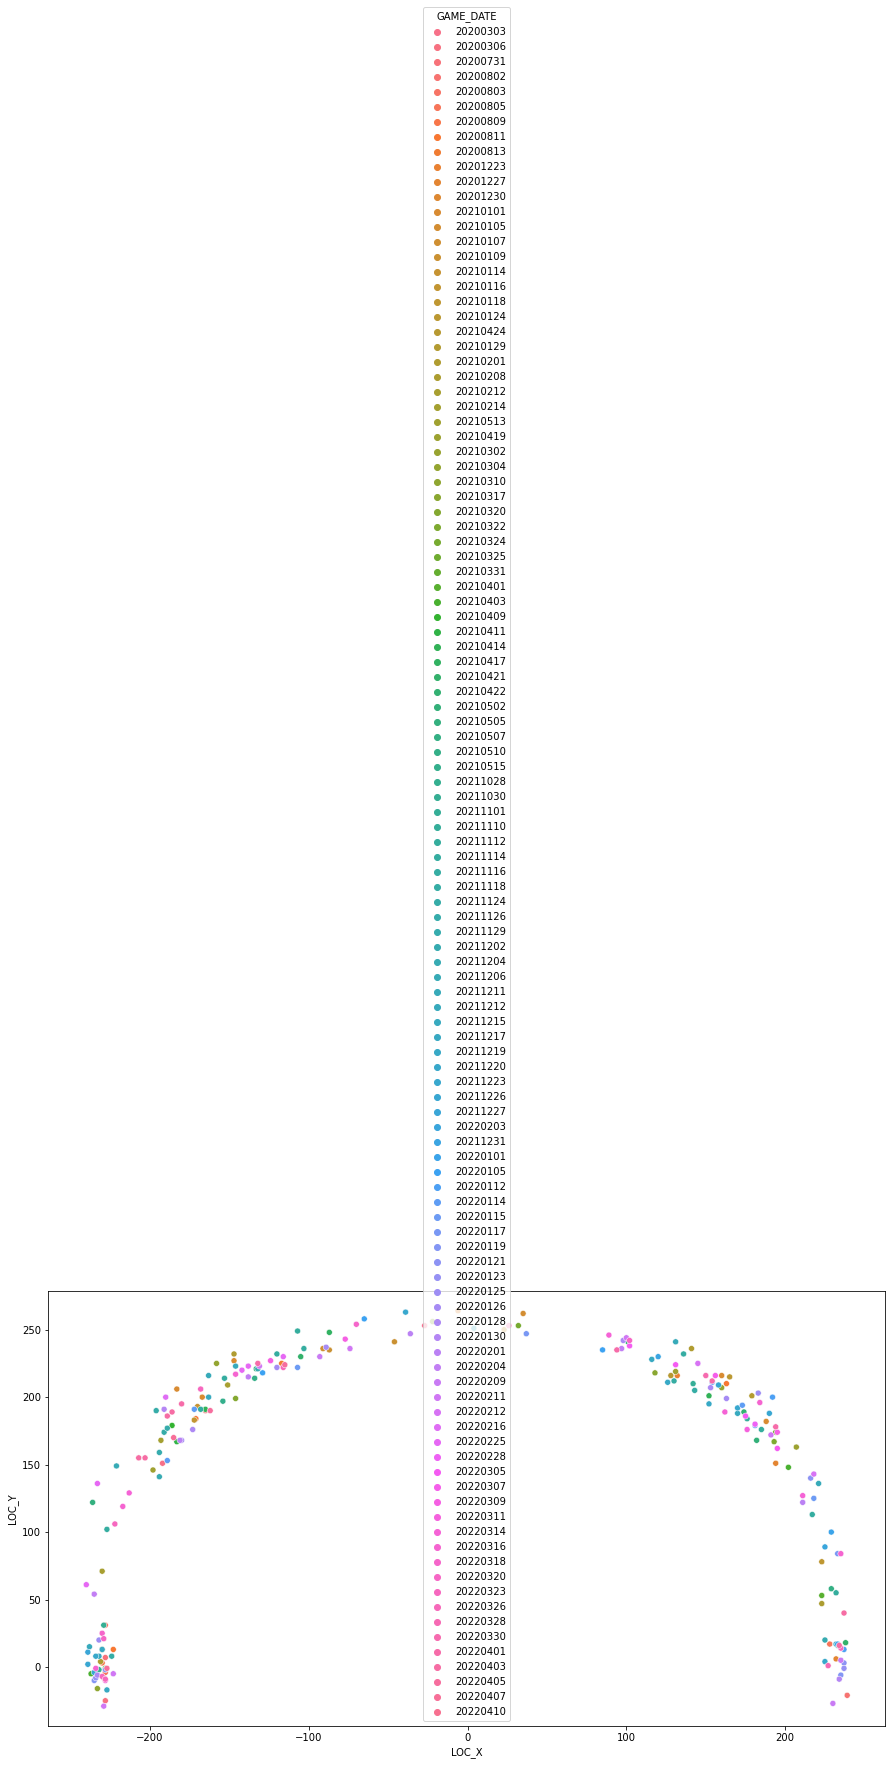

In [12]:
#creating a scatterplot of 3ptshots:
fig, ax1 = plt.subplots(figsize=(15,8))
sns.scatterplot(x= df3pt.LOC_X, y=df3pt.LOC_Y, data=df3pt.SHOT_TYPE == '3PT Field Goal', hue = df3pt.GAME_DATE)


In [13]:
#looking to find the 3pt shots that were missed:
print(df['SHOT_MADE_FLAG']== 0)

0      False
1      False
2      False
3      False
4      False
       ...  
857    False
858    False
859    False
860    False
861    False
Name: SHOT_MADE_FLAG, Length: 862, dtype: bool


#### Hmmm....doesn't exist...will have to try another endpoint..

In [14]:
#Lincoln found a good repo that holds the missed!
# Data and NBA API
import pandas as pd
import numpy as np

from scipy.stats import norm, gaussian_kde, percentileofscore

pd.options.display.max_columns = None
from nba_api.stats.static import players
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playercareerstats

# For Shot Chart
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
from matplotlib.path import Path
from matplotlib.patches import PathPatch

sns.set_style('white')
sns.set_color_codes()

In [37]:
#shotchartdetail using api:
def get_player_shotchartdetail(player_name, season_id):
    """
    Parameters
    ----------
    player_name: name of the player with Capital
    season_id: ex. 2012-13
    """
    
    # player dictionary
    nba_players = players.get_players()
    player_dict = [player for player in nba_players if player['full_name'] == player_name][0]
    
    # career df
    career = playercareerstats.PlayerCareerStats(player_id=player_dict['id'])
    career_df = career.get_data_frames()[0]
    
    # team id during the season
    team_id = career_df[career_df['SEASON_ID'] == season_id]['TEAM_ID']
    
    # shotchardtdetail endpoint
    shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id), 
                                                   player_id=int(player_dict['id']), 
                                                   season_type_all_star='Regular Season', 
                                                   season_nullable=season_id,
                                                   context_measure_simple="FGA").get_data_frames()
    
    return shotchartlist[0], shotchartlist[1]

In [101]:
player_shotchart_df, league_avg = get_player_shotchartdetail('LeBron James', '2012-13')

In [102]:
player_shotchart_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021200002,16,2544,LeBron James,1610612748,Miami Heat,1,9,44,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,19,122,149,1,1,20121030,MIA,BOS
1,Shot Chart Detail,0021200002,26,2544,LeBron James,1610612748,Miami Heat,1,8,20,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,17,-60,165,1,0,20121030,MIA,BOS
2,Shot Chart Detail,0021200002,62,2544,LeBron James,1610612748,Miami Heat,1,4,23,Made Shot,Turnaround Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,-71,17,1,1,20121030,MIA,BOS
3,Shot Chart Detail,0021200002,98,2544,LeBron James,1610612748,Miami Heat,1,1,2,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-8,9,1,0,20121030,MIA,BOS
4,Shot Chart Detail,0021200002,102,2544,LeBron James,1610612748,Miami Heat,1,0,45,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-75,165,1,1,20121030,MIA,BOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,Shot Chart Detail,0021201194,353,2544,LeBron James,1610612748,Miami Heat,3,4,42,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,18,182,14,1,0,20130414,MIA,CHI
1350,Shot Chart Detail,0021201194,361,2544,LeBron James,1610612748,Miami Heat,3,4,14,Missed Shot,Alley Oop Layup shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,10,1,1,0,20130414,MIA,CHI
1351,Shot Chart Detail,0021201194,510,2544,LeBron James,1610612748,Miami Heat,4,5,26,Missed Shot,Fadeaway Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,10,-89,60,1,0,20130414,MIA,CHI
1352,Shot Chart Detail,0021201194,533,2544,LeBron James,1610612748,Miami Heat,4,3,54,Missed Shot,Driving Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,5,37,34,1,0,20130414,MIA,CHI


In [103]:
df3ptrs = player_shotchart_df[player_shotchart_df.SHOT_TYPE == '3PT Field Goal']

<AxesSubplot:xlabel='LOC_X', ylabel='LOC_Y'>

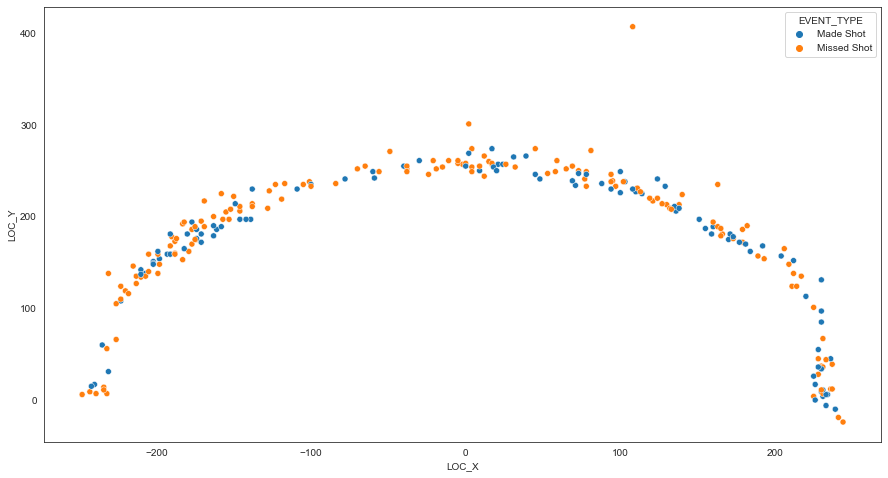

In [104]:
#creating a scatterplot of 3ptshots:
fig, ax1 = plt.subplots(figsize=(15,8))
sns.scatterplot(x= df3ptrs.LOC_X, y=df3ptrs.LOC_Y, data=df3ptrs.SHOT_TYPE == '3PT Field Goal', hue = df3ptrs.EVENT_TYPE)


In [84]:
# for loop for team id during the season
def get_player_shotchartdetail(player_name, season_id):
    """
    Parameters
    ----------
    player_name: name of the player with Capital
    season_id: ex. 2012-13
    """
    
    # player dictionary
    nba_players = players.get_players()
    player_dict = [player for player in nba_players if player['full_name'] == player_name][0]
    
    # career df
    career = playercareerstats.PlayerCareerStats(player_id=player_dict['id'])
    career_df = career.get_data_frames()[0]
    
    # team id during the season
    team_id = career_df[career_df['SEASON_ID'] == season_id]['TEAM_ID']
    
    # shotchardtdetail endpoint
    shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id), 
                                                   player_id=int(player_dict['id']), 
                                                   season_type_all_star='Regular Season', 
                                                   season_nullable=season_id,
                                                   context_measure_simple="FGA").get_data_frames()
    
    return shotchartlist[0], shotchartlist[1]

In [90]:
team_id = 1610612759
player_id = 1629640

career = playercareerstats.PlayerCareerStats(player_id)
career_df = career.get_data_frames()[0]

In [91]:
career_df

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1629640,2019-20,00,1610612759,SAS,20.0,17,1,301.0,53,89,0.596,13,22,0.591,35,44,0.795,10,47,57,15,14,2,13,28,154
1,1629640,2020-21,00,1610612759,SAS,21.0,69,67,1968.0,338,705,0.479,60,181,0.331,145,196,0.740,93,319,412,121,40,24,78,142,881
2,1629640,2021-22,00,1610612759,SAS,22.0,75,74,2392.0,471,1011,0.466,159,399,0.398,177,234,0.756,80,377,457,158,58,14,92,148,1278
